In [1]:
# ============================================================================
# STEP 1: ENVIRONMENT SETUP
# ============================================================================
# Load environment variables and initialize Google Earth Engine

from dotenv import load_dotenv
load_dotenv()

import ee, eemont
from forestry_carbon_arr.core import ForestryCarbonARR
from forestry_carbon_arr.utils.zarr_utils import save_dataset_efficient_zarr, load_dataset_zarr

import gcsfs
import os

fs = gcsfs.GCSFileSystem(project=os.getenv("GOOGLE_CLOUD_PROJECT"), token='/usr/src/app/user_id.json')

forestry = ForestryCarbonARR(config_path='./00_input/korindo.json')
forestry.initialize_gee()

✓ GEE Initialized successfully
  Credentials Path: /usr/src/app/user_id.json - loaded successfully


In [2]:
# ============================================================================
# STEP 2: LOAD AREA OF INTEREST (AOI) but only on the AOI concession
# ============================================================================
# Load the area of interest geometry for reference

from forestry_carbon_arr.core.utils import DataUtils
import geopandas as gpd
import geemap

data_utils = DataUtils(forestry.config, use_gee=True)
aoi_gpd, aoi_ee = data_utils.load_geodataframe_gee('./00_input/korindo_buffer.shp')

aoi_gpd_utm = aoi_gpd.to_crs(epsg=32749)

print(f"✅ AOI loaded: {len(aoi_gpd_utm)} features")
print(f"   Area: {aoi_gpd_utm.geometry.area.sum()/10000:.2f} hectares")

/opt/venv/lib/python3.12/site-packages/geemap/conversion.py:22: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


✅ AOI loaded: 1 features
   Area: 40740.66 hectares


In [3]:
import rioxarray as rxr
from dask.distributed import Client
client = Client()  # or Client(scheduler="processes")

storage = 'local'
if storage == 'local':
    # Load the data from the local file
    ds = rxr.open_rasterio('./00_input/Final_Segmented_Composite.tif', chunks={"band": 1, "x": 512, "y": 512})

In [4]:
ds

<xarray.DataArray (band: 165, y: 3225, x: 4497)> Size: 10GB
dask.array<open_rasterio-af5734c8ddd4f7e4c6d42d00f2881dd5<this-array>, shape=(165, 3225, 4497), dtype=float32, chunksize=(1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1kB 1 2 3 4 5 6 7 ... 159 160 161 162 163 164 165
  * x            (x) float64 36kB 5.786e+05 5.786e+05 ... 6.235e+05 6.235e+05
  * y            (y) float64 26kB 9.982e+06 9.982e+06 ... 9.949e+06 9.949e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_SOFTWARE:          GDAL 3.11.3e (3110322) (4.7.1;1745;3.0.3;2.2.4...
    AREA_OR_POINT:             Area
    RepresentationType:        ATHEMATIC
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        100
    STATISTICS_MEAN:           13.792248932948
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         22.758441987713
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0

In [5]:
# ds.coords['band'].values


In [6]:
list_band_names = ["B9_MEDIAN", "B9_MAXIMUM", "B9_MEAN", "B9_MINIMUM", "B9_STD", "B10_MEDIAN", "B10_MAXIMUM", "B10_MEAN", "B10_MINIMUM", "B10_STD", "B11_MEDIAN", "B11_MAXIMUM", "B11_MEAN", "B11_MINIMUM", "B11_STD", "B12_MEDIAN", "B12_MAXIMUM", "B12_MEAN", "B12_MINIMUM", "B12_STD", "B13_MEDIAN", "B13_MAXIMUM", "B13_MEAN", "B13_MINIMUM", "B13_STD", "B14_MEDIAN", "B14_MAXIMUM", "B14_MEAN", "B14_MINIMUM", "B14_STD", "B15_MEDIAN", "B15_MAXIMUM", "B15_MEAN", "B15_MINIMUM", "B15_STD", "B16_MEDIAN", "B16_MAXIMUM", "B16_MEAN", "B16_MINIMUM", "B16_STD", "B17_MEDIAN", "B17_MAXIMUM", "B17_MEAN", "B17_MINIMUM", "B17_STD", "B18_MEDIAN", "B18_MAXIMUM", "B18_MEAN", "B18_MINIMUM", "B18_STD", "B19_MEDIAN", "B19_MAXIMUM", "B19_MEAN", "B19_MINIMUM", "B19_STD", "B20_MEDIAN", "B20_MAXIMUM", "B20_MEAN", "B20_MINIMUM", "B20_STD", "B21_MEDIAN", "B21_MAXIMUM", "B21_MEAN", "B21_MINIMUM", "B21_STD", "B22_MEDIAN", "B22_MAXIMUM", "B22_MEAN", "B22_MINIMUM", "B22_STD", "B23_MEDIAN", "B23_MAXIMUM", "B23_MEAN", "B23_MINIMUM", "B23_STD", "B24_MEDIAN", "B24_MAXIMUM", "B24_MEAN", "B24_MINIMUM", "B24_STD", "B25_MEDIAN", "B25_MAXIMUM", "B25_MEAN", "B25_MINIMUM", "B25_STD", "B26_MEDIAN", "B26_MAXIMUM", "B26_MEAN", "B26_MINIMUM", "B26_STD", "B27_MEDIAN", "B27_MAXIMUM", "B27_MEAN", "B27_MINIMUM", "B27_STD", "B28_MEDIAN", "B28_MAXIMUM", "B28_MEAN", "B28_MINIMUM", "B28_STD", "B29_MEDIAN", "B29_MAXIMUM", "B29_MEAN", "B29_MINIMUM", "B29_STD", "B30_MEDIAN", "B30_MAXIMUM", "B30_MEAN", "B30_MINIMUM", "B30_STD", "B31_MEDIAN", "B31_MAXIMUM", "B31_MEAN", "B31_MINIMUM", "B31_STD", "B32_MEDIAN", "B32_MAXIMUM", "B32_MEAN", "B32_MINIMUM", "B32_STD", "B33_MEDIAN", "B33_MAXIMUM", "B33_MEAN", "B33_MINIMUM", "B33_STD", "B34_MEDIAN", "B34_MAXIMUM", "B34_MEAN", "B34_MINIMUM", "B34_STD", "B35_MEDIAN", "B35_MAXIMUM", "B35_MEAN", "B35_MINIMUM", "B35_STD", "B36_MEDIAN", "B36_MAXIMUM", "B36_MEAN", "B36_MINIMUM", "B36_STD", "B37_MEDIAN", "B37_MAXIMUM", "B37_MEAN", "B37_MINIMUM", "B37_STD", "B38_MEDIAN", "B38_MAXIMUM", "B38_MEAN", "B38_MINIMUM", "B38_STD", "B39_MEDIAN", "B39_MAXIMUM", "B39_MEAN", "B39_MINIMUM", "B39_STD", "B40_MEDIAN", "B40_MAXIMUM", "B40_MEAN", "B40_MINIMUM", "B40_STD", "B41_MEDIAN", "B41_MAXIMUM", "B41_MEAN", "B41_MINIMUM", "B41_STD"]
# len(list_band_names)

name_bands_unique = ["coastal_blue", "blue", "green1", "green", "yellow", "red", "redE1", "nir", "red_norm", "green_norm", "blue_norm", "nir_norm", "NDVI", "ndwi", "msavi2", "MTVI2", "VARI", "FCD2_1", "FCD1_1", "ARVI", "BAI", "EVI", "ExG", "ExGR", "CRI700", "GEMI", "GLI", "GNDVI", "MSR", "NGRDI", "NDREI", "NLI", "OSAVI", "RDVI", "RDVI_1", "SAVI", "TVI", "VIG", "WDRVI", "AVI", "SI"]
bands_from_9_up = name_bands_unique[8:]

In [7]:
list_band_index_unique = list(sorted(set([int(x.split('_')[0].replace('B', '')) for x in list_band_names])))
# list_band_index_unique

list_band_names_fixed = []

for i, band in enumerate(list_band_index_unique):
    for j, band_name in enumerate(list_band_names):
        if int(band_name.split('_')[0].replace('B', '')) == band:
            list_band_names_fixed.append(f'{bands_from_9_up[i]}_{band_name.split("_")[1]}')

import numpy as np

list_band_names_fixed = np.array(list_band_names_fixed)
# list_band_names_fixed


In [8]:
# ds

In [9]:
print(ds)

<xarray.DataArray (band: 165, y: 3225, x: 4497)> Size: 10GB
dask.array<open_rasterio-af5734c8ddd4f7e4c6d42d00f2881dd5<this-array>, shape=(165, 3225, 4497), dtype=float32, chunksize=(1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1kB 1 2 3 4 5 6 7 ... 159 160 161 162 163 164 165
  * x            (x) float64 36kB 5.786e+05 5.786e+05 ... 6.235e+05 6.235e+05
  * y            (y) float64 26kB 9.982e+06 9.982e+06 ... 9.949e+06 9.949e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_SOFTWARE:          GDAL 3.11.3e (3110322) (4.7.1;1745;3.0.3;2.2.4...
    AREA_OR_POINT:             Area
    RepresentationType:        ATHEMATIC
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        100
    STATISTICS_MEAN:           13.792248932948
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         22.758441987713
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0


In [10]:
import xarray as xr

ds_named = ds.assign_coords(band=("band", list_band_names_fixed))
ds_named = ds_named.drop_vars("spatial_ref")

plot_id = xr.DataArray(
    np.full((ds.sizes["y"], ds.sizes["x"]), "korindo", dtype=object),
    dims=("y", "x"),
    coords={"y": ds.y, "x": ds.x},
)

ds_clean = (
    ds_named.to_dataset(dim="band")
    .assign(plot_id=plot_id)
    .assign_attrs({"crs": "EPSG:32749"})
)

ds_clean

<xarray.Dataset> Size: 10GB
Dimensions:             (y: 3225, x: 4497)
Coordinates:
  * x                   (x) float64 36kB 5.786e+05 5.786e+05 ... 6.235e+05
  * y                   (y) float64 26kB 9.982e+06 9.982e+06 ... 9.949e+06
Data variables: (12/166)
    red_norm_MEDIAN     (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_MAXIMUM    (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_MEAN       (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_MINIMUM    (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_STD        (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    green_norm_MEDIAN   (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    ...                  ...
    SI_MEDIAN           (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    SI_MAXIMUM          (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    SI_MEAN             (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    SI_MINIMUM          (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    SI_STD              (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    plot_id             (y, x) object 116MB 'korindo' 'korindo' ... 'korindo'
Attributes:
    TIFFTAG_SOFTWARE:          GDAL 3.11.3e (3110322) (4.7.1;1745;3.0.3;2.2.4...
    AREA_OR_POINT:             Area
    RepresentationType:        ATHEMATIC
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        100
    STATISTICS_MEAN:           13.792248932948
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         22.758441987713
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0
    crs:                       EPSG:32749

In [11]:
## THIS IS THE BEST ONE FOR NOT DOING ANY CALCULATION MANUALLY LIKE WHAT WE DID IN UTILS!
import rioxarray  # ensure installed
buffer_pixels = 5

pixel_size = float(ds.x[1] - ds.x[0])
ds_masked = (ds_clean
    .rio.write_crs("EPSG:32749")
    .rio.clip(
        aoi_gpd_utm.to_crs("EPSG:32749").buffer(buffer_pixels * pixel_size).geometry,
        crs="EPSG:32749",
        drop=True,
    )
).assign_attrs({"crs": "EPSG:32749"}).drop_vars("spatial_ref")

ds_masked

<xarray.Dataset> Size: 10GB
Dimensions:             (x: 4497, y: 3224)
Coordinates:
  * x                   (x) float64 36kB 5.786e+05 5.786e+05 ... 6.235e+05
  * y                   (y) float64 26kB 9.982e+06 9.982e+06 ... 9.949e+06
Data variables: (12/166)
    red_norm_MEDIAN     (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_MAXIMUM    (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_MEAN       (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_MINIMUM    (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_STD        (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    green_norm_MEDIAN   (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    ...                  ...
    SI_MEDIAN           (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    SI_MAXIMUM          (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    SI_MEAN             (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    SI_MINIMUM          (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    SI_STD              (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    plot_id             (y, x) object 116MB nan nan nan nan ... nan nan nan nan
Attributes:
    TIFFTAG_SOFTWARE:          GDAL 3.11.3e (3110322) (4.7.1;1745;3.0.3;2.2.4...
    AREA_OR_POINT:             Area
    RepresentationType:        ATHEMATIC
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        100
    STATISTICS_MEAN:           13.792248932948
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         22.758441987713
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0
    crs:                       EPSG:32749

In [12]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            15Gi       6.5Gi       8.0Gi        20Mi       1.4Gi       9.1Gi
Swap:          1.0Gi          0B       1.0Gi


In [13]:
# import rasterio
# from rasterio.plot import show
# import matplotlib.pyplot as plt

# with rasterio.open('./00_input/Final_Segmented_Composite.tif') as src:
#     band_idx = 1                            # 1-based; pick the band you want
#     data = src.read(band_idx)               # 2-D array
#     fig, ax = plt.subplots(figsize=(10, 8))
#     show(data, transform=src.transform, ax=ax, cmap="viridis")
#     ax.set_title(f"Band {band_idx} — CRS {src.crs}")
#     plt.show()

In [14]:
# ds_masked

/opt/venv/lib/python3.12/site-packages/distributed/client.py:3374: UserWarning: Sending large graph of size 13.85 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


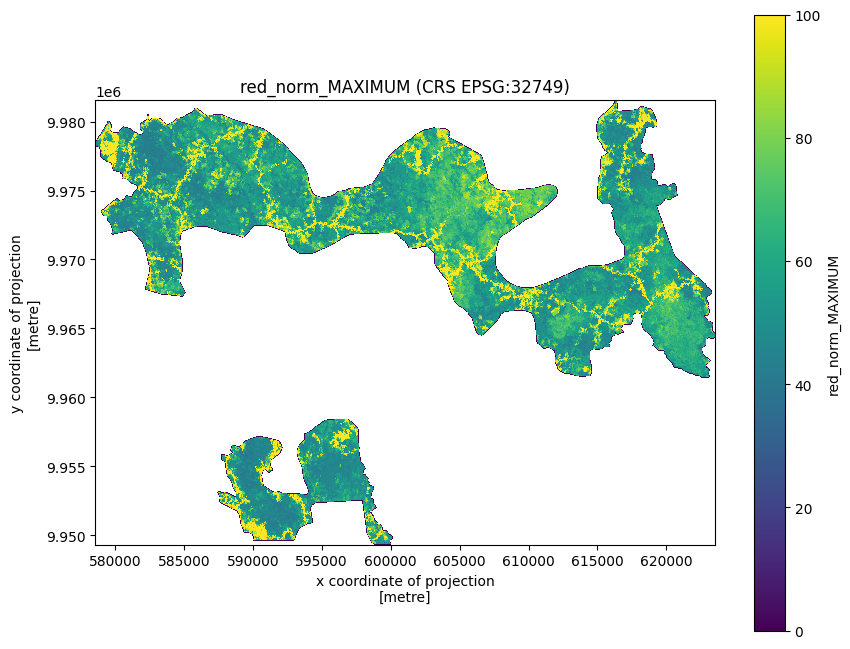

In [15]:
import matplotlib.pyplot as plt

band = "red_norm_MAXIMUM"

da = ds_masked[band]

fig, ax = plt.subplots(figsize=(10, 8))
da.plot.imshow(x="x", y="y", ax=ax, cmap="viridis")
ax.set_aspect("equal")
ax.set_title(f"{band} (CRS {ds_masked.attrs['crs']})")
plt.show()

In [16]:
# import numpy as np
# import xarray as xr
# do this stacking in the other notebook
# ds_stacked = ds_masked.drop_vars("spatial_ref", errors="ignore").stack(sample=("y", "x")).reset_index("sample")
# sample_ids = xr.DataArray(np.arange(ds_stacked.sizes["sample"], dtype=np.int64), dims="sample")
# ds_stacked = ds_stacked.assign_coords(sample=sample_ids)

# feature_vars = {name: ds_stacked[name] for name in ds_stacked.data_vars}
# ds_sample = xr.Dataset(
#     data_vars={"coord_x": ds_stacked["x"], "coord_y": ds_stacked["y"], **feature_vars},
#     coords={"sample": sample_ids},
#     attrs={"crs": ds_masked.attrs.get("crs", "EPSG:32749")},
# )

# ds_sample
ds_sample = ds_masked

In [17]:
print(ds_sample)

<xarray.Dataset> Size: 10GB
Dimensions:             (x: 4497, y: 3224)
Coordinates:
  * x                   (x) float64 36kB 5.786e+05 5.786e+05 ... 6.235e+05
  * y                   (y) float64 26kB 9.982e+06 9.982e+06 ... 9.949e+06
Data variables: (12/166)
    red_norm_MEDIAN     (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_MAXIMUM    (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_MEAN       (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_MINIMUM    (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    red_norm_STD        (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    green_norm_MEDIAN   (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    ...                  ...
    SI_MEDIAN           (y, x) float32 58MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    SI_MAXIMUM          (y, x) float32 58MB dask.array

In [18]:
# import dask.array as da

# plot_ids = ds_sample["plot_id"]
# unique_ids = (
#     da.unique(plot_ids.astype("object").fillna("__NA__").data)
#     .compute()
#     .tolist()
# )
# unique_ids = [uid for uid in unique_ids if uid != "__NA__"]
# unique_ids

In [19]:
# zarr_path = 'gs://remote_sensing_saas/01-korindo/planet_obia_arcgis/ds_clean_planet_obia_arcgis_202409_202507_median.zarr'
zarr_path = './01_output/ds_clean_planet_obia_arcgis_202409_202507_median.zarr'

# Save to zarr
chunk_sizes = {'x': 256, 'y': 256}
print("   Saving dataset to zarr...")
save_dataset_efficient_zarr(
    ds_sample,
    zarr_path,
    chunk_sizes=chunk_sizes,
    compression='lz4',
    compression_level=1,
    overwrite=True,
)
print(f"✅ Dataset saved to zarr")

   Saving dataset to zarr...
🗑️  Removing existing zarr store: ./01_output/ds_clean_planet_obia_arcgis_202409_202507_median.zarr
📦 Saving to zarr: ./01_output/ds_clean_planet_obia_arcgis_202409_202507_median.zarr
   🌍 GEE-compatible format (Zarr v2)
   Dimensions: {'x': 4497, 'y': 3224}
   Chunks: {'x': 256, 'y': 256}
   Compression: lz4 (level 1)
   Zarr version: 2
   Consolidated metadata: True
   Storage: local


/usr/src/app/forestry_carbon_arr/utils/zarr_utils.py:641: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"   Dimensions: {dict(ds.dims)}")
/usr/src/app/forestry_carbon_arr/utils/zarr_utils.py:710: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  dims = list(ds.dims.keys())


💾 Writing to zarr (with automatic parallelism)...


/usr/src/app/forestry_carbon_arr/utils/zarr_utils.py:729: FutureWarning: zarr_version is deprecated, use zarr_format
  ds_chunked.to_zarr(
/usr/src/app/forestry_carbon_arr/utils/zarr_utils.py:729: SerializationWarning: variable None has data in the form of a dask array with dtype=object, which means it is being loaded into memory to determine a data type that can be safely stored on disk. To avoid this, coerce this variable to a fixed-size dtype with astype() before saving it.
  ds_chunked.to_zarr(
/opt/venv/lib/python3.12/site-packages/distributed/client.py:3374: UserWarning: Sending large graph of size 128.50 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/opt/venv/lib/python3.12/site-packages/distributed/client.py:3374: UserWarning: Sending lar

✅ Dataset saved successfully!
   Store size: 555.42 MB
   Time: 902.6 seconds (15.0 minutes)
   Write speed: 0.6 MB/s
   Path: ./01_output/ds_clean_planet_obia_arcgis_202409_202507_median.zarr
✅ Dataset saved to zarr


In [20]:
ds_sample = load_dataset_zarr(zarr_path)
ds_sample

📂 Loading dataset from zarr: ./01_output/ds_clean_planet_obia_arcgis_202409_202507_median.zarr
✅ Dataset loaded: {'y': 3224, 'x': 4497}


/usr/src/app/forestry_carbon_arr/utils/zarr_utils.py:855: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"✅ Dataset loaded: {dict(ds.dims)}")


<xarray.Dataset> Size: 10GB
Dimensions:             (y: 3224, x: 4497)
Coordinates:
  * x                   (x) float64 36kB 5.786e+05 5.786e+05 ... 6.235e+05
  * y                   (y) float64 26kB 9.982e+06 9.982e+06 ... 9.949e+06
Data variables: (12/166)
    ARVI_MAXIMUM        (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    ARVI_MEAN           (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    ARVI_MEDIAN         (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    ARVI_MINIMUM        (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    ARVI_STD            (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    AVI_MAXIMUM         (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    ...                  ...
    VIG_STD             (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    WDRVI_MAXIMUM       (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    WDRVI_MEAN          (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    WDRVI_MEDIAN        (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    WDRVI_MINIMUM       (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
    WDRVI_STD           (y, x) float32 58MB dask.array<chunksize=(256, 256), meta=np.ndarray>
Attributes:
    TIFFTAG_SOFTWARE:          GDAL 3.11.3e (3110322) (4.7.1;1745;3.0.3;2.2.4...
    AREA_OR_POINT:             Area
    RepresentationType:        ATHEMATIC
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        100
    STATISTICS_MEAN:           13.792248932948
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         22.758441987713
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0
    crs:                       EPSG:32749